## Wrangling & Analyzing Data from WeRateDogs

For this project I'm going to wrangle and analyze data from the Twitter account [@dog_rates](https://twitter.com/dog_rates), a.k.a. WeRateDogs!

I've divided the project into four sections:

<ul>
<li><a href="#gather">Gathering the Data</a></li>
<li><a href="#assess">Assessing the Data</a></li>
<li><a href="#clean">Cleaning the Data</a></li>  
<li><a href="#analyze">Analyzing the Data</a></li>  
</ul>

In [2]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json

<a id='gather'></a>
## Gathering the Data

I'll start by getting the `twitter-archive-enhanced.csv` file with the pandas `read_csv` function:

In [4]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

I'll get the `image_predictions.tsv` file from Udacity's servers with the requests `get` function, write the response content to a file, and read it with the `read_csv` function (with tabs as separators instead of commas):

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode = "wb") as tsv_file:
    tsv_file.write(response.content)

image_predictions = pd.read_csv("image_predictions.tsv", sep = "\t")

I'll use tweepy to create an API object...

In [117]:
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

...then create a `tweet_json.txt` file, get each tweet's status data with the tweepy `get_status` method, and store the JSON data in the text file:

In [128]:
with open("tweet_json.txt", mode = "a") as txt_file:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = "extended")
            status = json.dumps(tweet._json)
            txt_file.write(f"{status}\n")
        except:
            pass

Finally, I'll get each tweet's tweet id, retweet count, and favorite count with the json `loads` function, using lists to turn those values into the `refav_counts` table with the pandas `DataFrame` function:

In [5]:
dataset = []
with open("tweet_json_udacity.txt") as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data["id"]
        retweet_count = data["retweet_count"]
        favorite_count = data["favorite_count"]
        dataset.append([tweet_id, retweet_count, favorite_count])
        
refav_counts = pd.DataFrame(dataset, columns = ["tweet_id", "retweet_count", "favorite_count"])

<a id='assess'></a>
## Assessing the Data

Now that I've gathered all the necessary data, it's time to assess it.

`twitter_archive`

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Check for duplicate tweet ids
twitter_archive.tweet_id.duplicated().sum()

0

In [5]:
# Number of retweets included in the dataset
twitter_archive[twitter_archive.retweeted_status_id.notnull()].shape[0]

181

In [6]:
# Number of replies included in the dataset
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()].shape[0]

78

In [79]:
# Number of rows with a denominator other than 10
twitter_archive[twitter_archive.rating_denominator != 10].shape[0]

23

In [70]:
# A sorted array of unique rating numerator values
twitter_archive.rating_numerator.sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [82]:
# Number of rows with a rating numerator higher than 14
twitter_archive[twitter_archive.rating_numerator > 14].shape[0]

28

In [86]:
# The 12 rows with a rating numerator larger than 14 and a rating denominator of 10
twitter_archive[(twitter_archive.rating_numerator > 14) & (twitter_archive.rating_denominator == 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [107]:
twitter_archive.name.sort_values().value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Winston           9
Bo                9
Sadie             8
the               8
Bailey            7
an                7
Toby              7
Buddy             7
Daisy             7
Bella             6
Rusty             6
Jack              6
Oscar             6
Scout             6
Dave              6
Leo               6
Koda              6
Milo              6
Jax               6
Stanley           6
Oakley            5
               ... 
Dante             1
Divine            1
Todo              1
Tonks             1
Dewey             1
Boston            1
Severus           1
Margo             1
Kaiya             1
Batdog            1
Mauve             1
Gabby             1
Willem            1
Birf              1
Strudel           1
Buddah            1
Brooks            1
Danny             1
Skittles          1


In [106]:
# A list of the unique names which begin with a lowercase letter
twitter_archive[twitter_archive.name.str[0].str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
mad              2
not              2
getting          2
actually         2
his              1
all              1
infuriating      1
life             1
old              1
unacceptable     1
my               1
incredibly       1
light            1
officially       1
by               1
such             1
space            1
this             1
Name: name, dtype: int64

In [97]:
# Number of rows in which the name begins with a lowercase letter
twitter_archive[twitter_archive.name.str[0].str.islower()].name.shape[0]

109

In [12]:
# Number of missing 'expanded_urls' values
twitter_archive[twitter_archive.expanded_urls.isnull()].shape[0]

59

In [15]:
# Rows with missing 'expanded_urls' values which are not replies
twitter_archive[(twitter_archive.expanded_urls.isnull()) & (twitter_archive.in_reply_to_status_id.isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


`image_predictions`

In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
list(image_predictions.p1.value_counts().index)

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'cocker_spaniel',
 'malamute',
 'French_bulldog',
 'miniature_pinscher',
 'Chesapeake_Bay_retriever',
 'seat_belt',
 'German_shepherd',
 'Siberian_husky',
 'Staffordshire_bullterrier',
 'web_site',
 'Cardigan',
 'Eskimo_dog',
 'teddy',
 'beagle',
 'Maltese_dog',
 'Shetland_sheepdog',
 'Lakeland_terrier',
 'Shih-Tzu',
 'Rottweiler',
 'Italian_greyhound',
 'kuvasz',
 'West_Highland_white_terrier',
 'Great_Pyrenees',
 'basset',
 'vizsla',
 'Pekinese',
 'American_Staffordshire_terrier',
 'dalmatian',
 'Old_English_sheepdog',
 'Border_collie',
 'Airedale',
 'Blenheim_spaniel',
 'kelpie',
 'soft-coated_wheaten_terrier',
 'collie',
 'English_springer',
 'boxer',
 'schipperke',
 'Bernese_mountain_dog',
 'Great_Dane',
 'borzoi',
 'tennis_ball',
 'whippet',
 'Boston_bull',
 'dingo',
 'malinois',
 'doormat',
 'miniature_poodle',
 'English_setter',
 'flat-coated_retrie

In [18]:
# Check for duplicate tweet ids
image_predictions.tweet_id.duplicated().sum()

0

In [24]:
refav_counts.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [31]:
refav_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
# Compare the number rows of the tables which are going to be merged
twitter_archive.shape[0], refav_counts.shape[0]

(2356, 2354)

### Quality

`twitter_archive` table

- The **rating_denominator** column contains 23 rows with a value other than 10 which it may be best to remove for the sake of a consistent analysis later on.


- The **rating_numerator** column's data type should be a float, because WeRateDogs often has ratings with a decimal point (so all the rating numerator values should probably be re-extracted from the **text** column).


- The **rating_numerator** column contains values up to 1776. Everything above 14 is either a retweet, a reply, a joke, or an error, so the 12 rows with a rating numerator above 14 (and a rating denominator of 10) can be considered outliers best removed for the sake of the analysis later on.


- The **name** column contains 109 rows which start with a lowercase letter. This is not an issue in itself, but those 109 "names" also happen to be non-names, so they should be replaced with "None."


- 'Floofer' is not a "dog stage" according to the Dogtionary, but 'floof' is, so the "floofer" values in the **floofer** column should be changed (although the tweets do refer to the dogs as "floofers").


- Since the project's key points state that we only want "original ratings," no retweets, any rows for which **retweeted_status_id** is not null should be removed.\*


- The **expanded_urls** column has 3 missing values (for rows which are neither replies nor retweets). 


- The **timestamp** column's data type should be *datetime*.



`image_predictions` table

- The values in the **p1**, **p2**, and **p3** columns mix lowercase and sentence case (and also use underscores instead of spaces).


\*And it could be argued that the replies included are not really "original ratings" either, so any rows for which **in_reply_to_status_id** is not null should be removed as well (there are only 181 retweets and 78 replies, 259 rows in total, a small number in relation to the entire dataset).

### Tidiness

`twitter_archive` table

- The **doggo**, **floofer**, **pupper**, and **puppo** columns and their values can be combined into one **dog_stage** column.


- The `twitter_archive`, `refav_counts`, and `image_predictions` tables should be combined.

<a id='clean'></a>
## Cleaning the Data

The original datasets should remain untouched, so I'll make copies of the two tables with quality and tidiness issues (`twitter_archive` and `image_predictions`):

In [6]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
refav_counts_clean = refav_counts_clean.copy()

### Quality

`twitter_archive_clean`

*Definition of issue*

1. Remove any rows where the **in_reply_to_status_id** or **retweeted_status_id** columns don't contain null values (i.e., remove any replies or retweets):

In [7]:
# Code
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.in_reply_to_status_id.isnull()) & (twitter_archive_clean.retweeted_status_id.isnull())]

In [8]:
# Test: check if there are any non-null values in the reply or retweet id columns
twitter_archive_clean[(twitter_archive_clean.in_reply_to_status_id.notnull()) & (twitter_archive_clean.retweeted_status_id.notnull())].shape[0]

0

*Definition of issue*

2. Remove any rows with a **rating_denominator** other than 10 (but save them in a separate table, `twitter_archive_clean_rdnot10` ("rdnot10" for "rating denominator not 10"), for possible further investigation later on:

In [13]:
# Code
twitter_archive_clean_rdnot10 = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

In [14]:
# Test: check if there are any rows with a rating denominator other than 10
twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].shape[0]

0

*Definition of issue*

3. Re-extract the **rating_numerator** column's data from the **text** column with the `str.extract` method and convert the values to floats:

In [15]:
# Code
twitter_archive_clean.rating_numerator = twitter_archive_clean.text.str.extract(r"(\d+/10|\d+\.\d+/10)")[0].str.replace("/10", "").astype(float)

In [16]:
# Test: check unique values in the 'rating_numerator' column
twitter_archive_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       152
8.00        98
7.00        51
14.00       38
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [17]:
# Test: Check the data type of the 'rating_numerator' column
twitter_archive_clean.rating_numerator.dtype

dtype('float64')

*Definition of issue*

4. Remove the two rows with `rating_numerator` values above 14 (because they are extreme outliers, and the tweets also happen to be jokes, one with Snoop Dogg and one celebrating the founding of the United States):

In [18]:
# Code
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator <= 14]

In [19]:
# Test: check if there are any values greater than 14
twitter_archive_clean[twitter_archive_clean.rating_numerator > 14].shape[0]

0

*Definition of issue*

5. Change the **timestamp** column's data type using the `to_datetime` function:

In [20]:
# Code
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [21]:
# Test: check the data type of the 'timestamp' column
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

*Definition of issue*

6. In the **name** column, replace the values that begin with a lowercase letter with "None":

In [22]:
# Code
twitter_archive_clean.loc[twitter_archive_clean.name.str.islower(), "name"] = "None"

In [24]:
# Test: check to see if there are any values beginning with a lowercase letter
twitter_archive_clean[twitter_archive_clean.name.str.islower()].shape[0]

0

*Definition of issue*

7. Replace any "floofer" values in the **floofer** column with "floof" (and rename the column to **floof** to avoid any confusion):

In [25]:
# Code
twitter_archive_clean.rename(columns = {"floofer": "floof"}, inplace = True)
twitter_archive_clean.floof = twitter_archive_clean.floof.str.replace("floofer", "floof")

In [26]:
# Test: check that column name and values have been changed to "floof"
twitter_archive_clean["floof"][twitter_archive_clean.floof != "None"]

46      floof
200     floof
582     floof
774     floof
984     floof
1022    floof
1091    floof
1110    floof
1534    floof
1614    floof
Name: floof, dtype: object

`image predictions_clean`

*Definition of issue*

8. In the **p1**, **p2**, and **p3** columns, replace the underscores with spaces using the `str.replace` method, and then capitalize all values with the `str.capitalize` method (the `str.title` method could also be used, but I'm unsure about dog breed spelling conventions):

In [27]:
# Code
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace("_", " ").str.capitalize()
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace("_", " ").str.capitalize()
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace("_", " ").str.capitalize()

In [28]:
# Test
image_predictions_clean[["p1", "p2", "p3"]].head(10)

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman
5,Bernese mountain dog,English springer,Greater swiss mountain dog
6,Box turtle,Mud turtle,Terrapin
7,Chow,Tibetan mastiff,Fur coat
8,Shopping cart,Shopping basket,Golden retriever
9,Miniature poodle,Komondor,Soft-coated wheaten terrier


### Tidiness

I'll begin by removing any irrelevant columns:

In [30]:
# Code
columns_to_drop = ["in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
twitter_archive_clean.drop(columns_to_drop, axis = 1, inplace = True)

In [31]:
# Test: check to see which columns remain
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

*Definition of issue*

1. Combine the **doggo**, **floof**, **pupper**, and **puppo** columns into one **dog_stage** column using the `agg` and `str.replace` methods (and drop the individual columns):

In [32]:
# Code
twitter_archive_clean["dog_stage"] = twitter_archive_clean[["doggo", "floof", "pupper", "puppo"]].agg("-".join, axis=1).str.replace("None-", "").str.replace("-None", "")
twitter_archive_clean.drop(["doggo", "floof", "pupper", "puppo"], axis = 1, inplace = True)

In [33]:
# Test: check to see which columns remain
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [34]:
# Test: check unique values in the 'dog_stage' column
twitter_archive_clean.dog_stage.value_counts()

None            1742
pupper           221
doggo             72
puppo             23
doggo-pupper       9
floof              9
doggo-puppo        1
doggo-floof        1
Name: dog_stage, dtype: int64

The "doggo-puppo" is actually a "puppo," and the "doggo-floof" is actually a "floof," so those are easy to fix, but the reasons for the "doggo-pupper" values are inconsistent, so I'll remove them (but save them in a separate table, `twitter_archive_clean_dp` ("dp" for "doggo-pupper"), for possible further investigation later on):

In [36]:
# Code
twitter_archive_clean_dp = twitter_archive_clean[twitter_archive_clean.dog_stage == "doggo-pupper"]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_stage != "doggo-pupper"]
twitter_archive_clean.replace({"dog_stage": {"None": np.nan, "doggo-puppo": "puppo", "doggo-floof": "floof"}}, inplace = True)

In [37]:
# Test: check unique values in the 'dog_stage' column again
twitter_archive_clean.dog_stage.value_counts()

pupper    221
doggo      72
puppo      24
floof      10
Name: dog_stage, dtype: int64

*Definition of issue*

2. The `twitter_archive_clean`, `refav_counts_clean`, and `image_predictions_clean` tables should all be combined using the `merge` function:

In [39]:
# Code
twitter_archive_master = pd.merge(pd.merge(twitter_archive_clean, refav_counts_clean, on = "tweet_id", how = "left"), image_predictions_clean, on = "tweet_id", how = "left")

In [42]:
# Test
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,42908,...,1.0,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,41048,...,2.0,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


In [41]:
# Test to see that all columns were merged correctly
list(twitter_archive_master)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [43]:
# Save 'twitter_archive_master' as csv files
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)

<a id='analyze'></a>
## Analyzing the Data

Now it's finally time to analyze the data with pandas and Pyplot visualizations!

In [62]:
import matplotlib.pyplot as plt
% matplotlib inline

twitter_archive_analysis = pd.read_csv("twitter_archive_master.csv")

How many rows are there with one of the four "dog stages" (i.e., which rows do not have "None" as its "dog stage" values)?

In [64]:
twitter_archive_ds = twitter_archive_analysis[twitter_archive_analysis.dog_stage != "None"]
twitter_archive_ds.shape[0]

327

What does the distribution of ratings look like for the entire dataset compared to this subset only including the four dog stages?

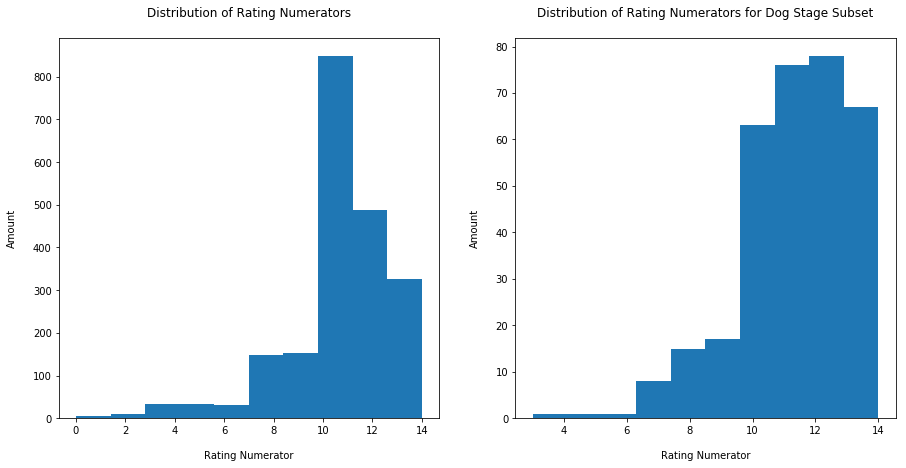

In [21]:
plt.subplots(figsize = (15,7))
chart_1 = plt.subplot(1, 2, 1, title = "Distribution of Rating Numerators\n", xlabel = "\nRating Numerator", ylabel = "Amount\n")
chart_2 = plt.subplot(1, 2, 2, title = "Distribution of Rating Numerators for Dog Stage Subset\n", xlabel = "\nRating Numerator", ylabel = "Amount\n")
chart_1.hist(twitter_archive_analysis.rating_numerator)
chart_2.hist(twitter_archive_ds.rating_numerator);

The distribution is clearly skewed in both, to the left, so while there is a wide range of ratings, the high ratings (from about 10 to 13 for the entire dataset, from about 10 to 14 for the subset) are the most common ones. WeRateDogs are (unsurprisingly) quite generous with their ratings! The distributions look similar enough, so I'll just focus on the subset in this analysis. 

Because there's such a difference in numbers between each category...

In [26]:
twitter_archive_ds.dog_stage.value_counts()

pupper    221
doggo      72
puppo      24
floof      10
Name: dog_stage, dtype: int64

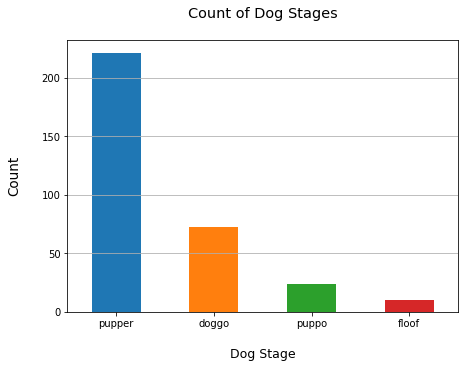

In [52]:
plt.figure(figsize = (7, 5))
twitter_archive_ds.dog_stage.value_counts().plot(kind = "bar")
plt.title("Count of Dog Stages\n", fontsize = 14.5)
plt.xlabel("\nDog Stage", fontsize = 12.5)
plt.ylabel("Count\n", fontsize = 13.5)
plt.xticks(rotation = 0)
plt.grid(axis = "y");

...I'll only focus on means for the rest of this analysis.

What are the average ratings for the four dog stages?

In [23]:
dog_stage_means = twitter_archive_ds.groupby("dog_stage").rating_numerator.mean()
dog_stage_means

dog_stage
doggo     11.847222
floof     11.800000
pupper    10.734253
puppo     12.041667
Name: rating_numerator, dtype: float64

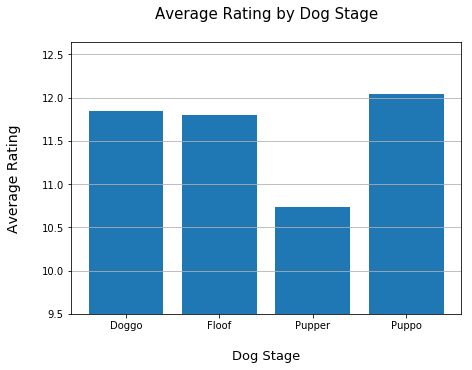

In [58]:
plt.figure(figsize = (7, 5))
plt.bar(["Doggo", "Floof", "Pupper", "Puppo"], dog_stage_means)
plt.title("Average Rating by Dog Stage\n", fontsize = 15)
plt.xlabel("\nDog Stage", fontsize = 13)
plt.ylabel("Average Rating\n", fontsize = 14)
# I'll set the start value for the y-axis at 9.5 to make it easier to see the differences
plt.ylim(bottom = 9.5)
plt.grid(axis = "y");

There's not any significant difference between the average ratings for the four dog stages, so they're almost equally beloved by WeRateDogs, but while the average rating for "puppers" is visibly lower than the other three categories, the average rating for "puppers" is just barely higher than "doggos" and "floofs" (a difference I've exaggerated in this chart).

What about the average amount of retweets and likes? Is any dog stage significantly more popular among the audience?

In [65]:
ds_refav_means = twitter_archive_ds.groupby("dog_stage")[["retweet_count", "favorite_count"]].mean().astype(int)
ds_refav_means.rename(columns = {"retweet_count": "Average number of retweets", "favorite_count": "Average number of likes"}, inplace = True)
ds_refav_means

,Average number of retweets,Average number of likes
dog_stage,,
doggo,6610,18060
floof,4083,11674
pupper,2486,7249
puppo,7124,22715


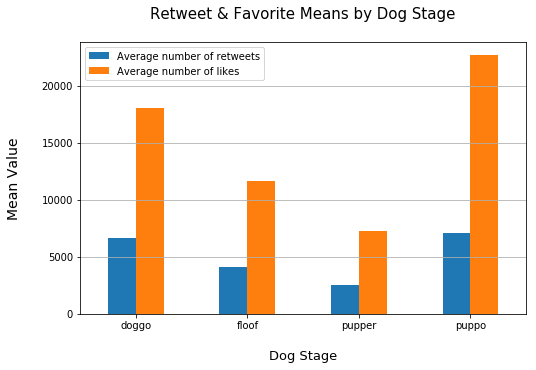

In [67]:
ds_refav_means.plot.bar(figsize = (8, 5), rot = 0)
plt.xlabel("\nDog Stage", fontsize = 13)
plt.ylabel("Mean Value\n", fontsize = 14)
plt.title("Retweet & Favorite Means by Dog Stage\n", fontsize = 15)
plt.grid(axis = "y");

In terms of average number of likes, "puppos," the second smallest category in size, are clearly the most liked, but in terms of average number of retweets, there's not any significant difference between "puppos" and "doggos." Interestingly, "floofs," the smallest category in size, are, on average, much more liked and retweeted than "puppers," the largest category in size. In comparison to the ratings, there is a clear difference in how the audience feels about the different dog stages!